In [116]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.recfunctions import append_fields

file_1 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
file_2 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv"
file_3 = "datasets/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv"
file_4 = "datasets/resale-flat-prices/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv"

# notice that i drop 'remaining_lease' from df_1 and df_2 
df_1 = np.genfromtxt(file_1,skip_header=1, 
                     dtype=[('month','U50' ),('town','U50' ),('flat_type','U50' ),('block','U50' ),
                          ('street_name','U50' ),('storey_range','U50' ),('floor_area_sqm','f8' ),('flat_model','U50' ),
                          ('lease_commence_date','U50'),('resale_price','f8' )],
                     usecols=(0,1,2,3,4,5,6,7,8,10),delimiter=",",missing_values=['na','-'],filling_values=[0])

df_2 = np.genfromtxt(file_2, skip_header=1, 
                     dtype=[('month','U50' ),('town','U50' ),('flat_type','U50' ),('block','U50' ),
                            ('street_name','U50' ),('storey_range','U50' ),('floor_area_sqm','f8' ),('flat_model','U50' ),
                            ('lease_commence_date','U50'),('resale_price','f8' )],
                      usecols=(0,1,2,3,4,5,6,7,8,10), delimiter=",", missing_values=['na','-'],filling_values=[0])

df_3 = np.genfromtxt(file_3, skip_header=1, 
                     dtype=[('month','U50' ),('town','U50' ),('flat_type','U50' ),('block','U50' ),
                          ('street_name','U50' ),('storey_range','U50' ),('floor_area_sqm','f8' ),('flat_model','U50' ),
                          ('lease_commence_date','U50'),('resale_price','f8' )],
                           delimiter=",", missing_values=['na','-'],filling_values=[0])
df_4 = np.genfromtxt(file_4, skip_header=1, 
                     dtype=[('month','U50' ),('town','U50' ),('flat_type','U50' ),('block','U50' ),
                            ('street_name','U50' ),('storey_range','U50' ),('floor_area_sqm','f8' ),('flat_model','U50' ),
                            ('lease_commence_date','U50'),('resale_price','f8' )],
                           delimiter=",", missing_values=['na','-'],filling_values=[0])

df= np.concatenate ([df_1,df_2,df_3,df_4],axis=0)

#data adjustments
resale = list(df['resale_price'])
price_000 =[ r/1000 for r in resale]

mth_q = list(df['month'])
year_only = [m[:4] for m in mth_q]
qtr_map = {'01':'Q1','02':'Q1','03':'Q1',
           '04':'Q2','05':'Q2','06':'Q2',
           '07':'Q3','08':'Q3','09':'Q3',
           '10':'Q4','11':'Q4','12':'Q4'}
qtr_only = [qtr_map[m[5:]] for m in mth_q]
mth_qtr_only = [x+"-"+y for x, y  in zip (year_only,qtr_only)] 

watchlist = list(np.unique(df['storey_range']))
watchlist.sort()
mapping_dict = {v : i + 1 for i,v in enumerate(watchlist) }
stories = list(df['storey_range'])
stories_ranked = [mapping_dict[s]for s in stories]

location_map ={'ANG MO KIO':'Central', 'BEDOK':'East', 'BISHAN':'Central','BUKIT BATOK':'West','BUKIT MERAH':'Central',
               'BUKIT PANJANG':'West','BUKIT TIMAH':'Central','CENTRAL AREA':'Central','CHOA CHU KANG':'West',
               'CLEMENTI':'West','GEYLANG':'Central','HOUGANG':'North-East','JURONG EAST':'West','JURONG WEST':'West',
              'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'East', 'PASIR RIS':'East', 'PUNGGOL':'North-East',
              'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North-East', 
              'SERANGOON':'North-East', 'TAMPINES':'East','TOA PAYOH': 'Central','WOODLANDS':'North', 'YISHUN':'North'}
locations = list(df['town'])
zones = [location_map[loc] for loc in locations]

df = append_fields(df,'price',price_000, usemask=False,dtypes = "f8") 
df = append_fields(df,'years',year_only, usemask=False,dtypes = "U10") 
df = append_fields(df,'qtr',qtr_only, usemask=False,dtypes = "U10") 
df = append_fields(df,'mth_qtr',mth_qtr_only, usemask=False,dtypes = "U10")
df = append_fields(df,'storey_ranked',stories_ranked, usemask=False,dtypes = "f8")
df = append_fields(df,'zones',zones, usemask=False,dtypes = "U50")

def plot_scatter(year,rm_type):
    x_col = 'storey_ranked' 
    f_type = rm_type
    f_type_lower = f_type.lower()

    y_price_central = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='Central')]['price']
    x_storey_central = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='Central')][x_col]

    y_price_west = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='West')]['price']
    x_storey_west = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='West')][x_col]

    y_price_ne = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='North-East')]['price']
    x_storey_ne = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='North-East')][x_col]

    y_price_east = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='East')]['price']
    x_storey_east = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='East')][x_col]

    y_price_north = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='North')]['price']
    x_storey_north = df[(df['years']==year) & (df['flat_type']==f_type) & (df['zones']=='North')][x_col]
    
    array_1 = df[(df['years']==year) & (df['flat_type']==f_type)]['price']
    median_line = np.percentile(array_1, 50) 
    upper_line_1 = np.percentile(array_1, 75)
    q75, q25 = np.percentile(array_1, [75 ,25])
    iqr = q75 - q25
    upper_line_2 = q75 + (1.5 * iqr)
    
    plt.style.use('ggplot')
    fig = plt.figure(figsize =(20,10))
    ax1 = fig.add_subplot(111)
    
    ax1.scatter(x_storey_central, y_price_central  , label='Central')
    ax1.scatter(x_storey_west , y_price_west ,  label='West')
    ax1.scatter(x_storey_ne , y_price_ne , label='North-East')
    ax1.scatter(x_storey_east , y_price_east ,  label='East')
    ax1.scatter(x_storey_north , y_price_north ,label='North')

    plt.legend(loc='upper left');
    plt.title("Correlation Between Storey and Resale Price by Zones in {} for {} flat-type".format(year,f_type_lower),
              fontsize=25)
    
    xmin, xmax, ymin, ymax = plt.axis()
    space_ = np.linspace(ymin,ymax)
    spacing = (space_[1] - space_[0]) + 2
    
    plt.axhline(y=median_line, color='b', linestyle='dashed')
    plt.text(xmax , median_line + spacing, '50th percentile: ${}k'.format(int(median_line)), 
             fontsize=15, color='b',style='italic',
             horizontalalignment='right', verticalalignment='top')   
    
    plt.axhline(y=upper_line_1, color='g', linestyle='dashed')
    plt.text(xmax , upper_line_1 + spacing, '75th percentile: ${}k'.format(int(upper_line_1)), 
             fontsize=15, color='g',style='italic',
            horizontalalignment='right', verticalalignment='top')   
    
    plt.axhline(y=upper_line_2, color='r', linestyle='dashed')
    plt.text(xmax , upper_line_2 + spacing, 'IQR upper bound: ${}k'.format(int(upper_line_2)), 
             fontsize=15, color='r',style='italic',
            horizontalalignment='right', verticalalignment='top')

    plt.ylabel('Resale Price in \'000',fontsize=21)
    plt.xlabel('Ranked Storey',fontsize=21)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20,rotation = 45)
    plt.show()

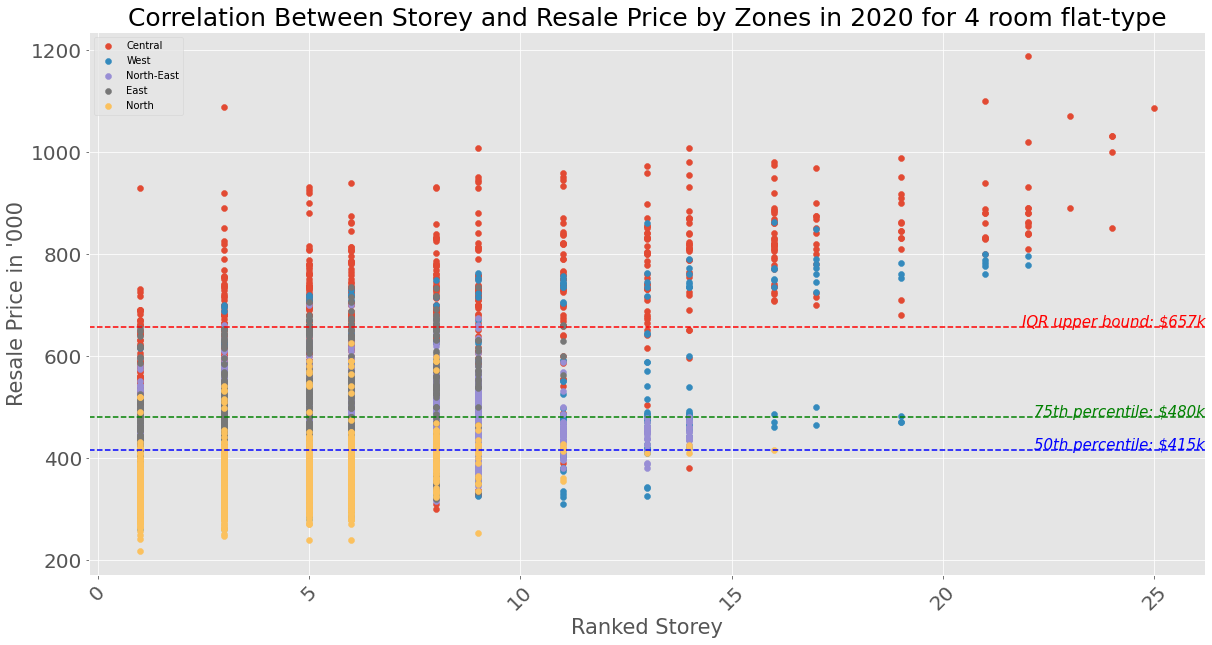

169.5556 1235.3324


In [118]:
plot_scatter('2020','4 ROOM')

In [15]:
array_1 = df[(df['years']=="2020") & (df['flat_type']=='4 ROOM')]['price']

array([300.7       , 312.50816327, 324.31632653, 336.1244898 ,
       347.93265306, 359.74081633, 371.54897959, 383.35714286,
       395.16530612, 406.97346939, 418.78163265, 430.58979592,
       442.39795918, 454.20612245, 466.01428571, 477.82244898,
       489.63061224, 501.43877551, 513.24693878, 525.05510204,
       536.86326531, 548.67142857, 560.47959184, 572.2877551 ,
       584.09591837, 595.90408163, 607.7122449 , 619.52040816,
       631.32857143, 643.13673469, 654.94489796, 666.75306122,
       678.56122449, 690.36938776, 702.17755102, 713.98571429,
       725.79387755, 737.60204082, 749.41020408, 761.21836735,
       773.02653061, 784.83469388, 796.64285714, 808.45102041,
       820.25918367, 832.06734694, 843.8755102 , 855.68367347,
       867.49183673, 879.3       ])

In [18]:
np.percentile(array_1, 50) 

415.0

In [19]:
np.percentile(array_1, 75) 

480.0

In [58]:
np.max(df['storey_ranked'])

25.0

In [4]:
zone_ = ['Central', 'East', 'North', 'North-East', 'West']

In [5]:
df.dtype

dtype([('month', '<U50'), ('town', '<U50'), ('flat_type', '<U50'), ('block', '<U50'), ('street_name', '<U50'), ('storey_range', '<U50'), ('floor_area_sqm', '<f8'), ('flat_model', '<U50'), ('lease_commence_date', '<U50'), ('resale_price', '<f8'), ('price', '<f8'), ('years', '<U10'), ('qtr', '<U10'), ('mth_qtr', '<U10'), ('storey_ranked', '<f8'), ('zones', '<U50')])

In [21]:
df

array([('2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12',  44., 'Improved', '1979', 232000., 232., '2017', 'Q1', '2017-Q1', 6., 'Central'),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03',  67., 'New Generation', '1978', 250000., 250., '2017', 'Q1', '2017-Q1', 1., 'Central'),
       ('2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03',  67., 'New Generation', '1980', 262000., 262., '2017', 'Q1', '2017-Q1', 1., 'Central'),
       ...,
       ('2012-02', 'YISHUN', '5 ROOM', '873', 'YISHUN ST 81', '01 TO 03', 122., 'Improved', '1988', 488000., 488., '2012', 'Q1', '2012-Q1', 1., 'North'),
       ('2012-02', 'YISHUN', 'EXECUTIVE', '664', 'YISHUN AVE 4', '07 TO 09', 181., 'Apartment', '1992', 705000., 705., '2012', 'Q1', '2012-Q1', 5., 'North'),
       ('2012-02', 'YISHUN', 'EXECUTIVE', '293', 'YISHUN ST 22', '04 TO 06', 163., 'Apartment', '1992', 630000., 630., '2012', 'Q1', '2012-Q1', 3., 'North')],
      dtype=